# ver 03 Noct Nikkor 58mm f1.2 Reverse Engineering Effort 

### May 2025

The picture of the optical setup was scalled and specs retrieved for zemax simulations. The results transfared to Optiland

In [5]:
import numpy as np

from optiland import optic, fields
from optiland.materials import AbbeMaterial, IdealMaterial, Material

## Building a Lens

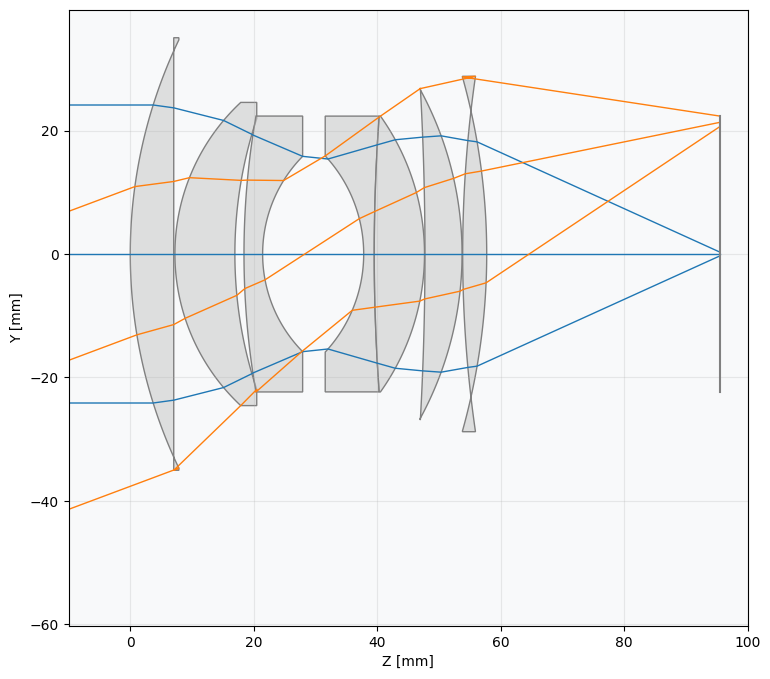

In [6]:
NOCTNIKOR58f12 = optic.Optic()


## define glasses
#
# not all defined glasses are used. Optiland does not have all zemax glasses thus they are defined here with AbbeMaterial


GlassMystic = AbbeMaterial(n=1.7963, abbe=40.08)   # this glass is my wild guess that it was used. See other patents from that era with wide f>1.4

JSFH5 = AbbeMaterial(n=1.755750, abbe=24.71)
JSFH6 = AbbeMaterial(n=1.713380, abbe=26.04)
TAF48 = AbbeMaterial(n=1.7909, abbe=48.092)

EFDL10L = AbbeMaterial(n=1.7282, abbe=28.321)

JLAF04 = AbbeMaterial(n=1.757, abbe=47.863)

# define surfaces
NOCTNIKOR58f12.add_surface(index=0, radius=np.inf, thickness=np.inf)
NOCTNIKOR58f12.add_surface(index=1, radius=80.344, thickness=7.042, material=GlassMystic) 
NOCTNIKOR58f12.add_surface(index=2, radius=np.inf, thickness=0.189)
NOCTNIKOR58f12.add_surface(index=3, radius=33.61, thickness=9.715, material="J-LASF015")
NOCTNIKOR58f12.add_surface(index=4, radius=69.686, thickness=1.476)
NOCTNIKOR58f12.add_surface(index=5, radius=129.534, thickness=3.02, material=JSFH6)
NOCTNIKOR58f12.add_surface(index=6, radius=22.55, thickness=8.47)
NOCTNIKOR58f12.add_surface(index=7, radius=np.inf, thickness=7.9, is_stop=True)
NOCTNIKOR58f12.add_surface(index=8, radius=-23.365, thickness=1.71, material=EFDL10L)
NOCTNIKOR58f12.add_surface(index=9, radius=311.537, thickness=8.141, material=JLAF04)
NOCTNIKOR58f12.add_surface(index=10, radius=-38.532, thickness=0.074)
NOCTNIKOR58f12.add_surface(index=11, radius=-483.703, thickness=6.009, material="E-LASF09")
NOCTNIKOR58f12.add_surface(index=12, radius=-55.749, thickness=0.1)
NOCTNIKOR58f12.add_surface(index=13, radius=200.86, thickness=3.894,  material="L-LAH85")
NOCTNIKOR58f12.add_surface(index=14, radius=-106.579, thickness=37.78)
NOCTNIKOR58f12.add_surface(index=15)

# define aperture
NOCTNIKOR58f12.set_aperture(aperture_type="imageFNO", value=1.2)

# define fields
NOCTNIKOR58f12.set_field_type(field_type="angle")
NOCTNIKOR58f12.add_field(y=0)
# singlet.add_field(y=10)
NOCTNIKOR58f12.add_field(y=20.5, vy=100, vx=100.0)  # vignetting is a little bit mysterious

# define wavelengths
NOCTNIKOR58f12.add_wavelength(value=0.58756, is_primary=True)

# view in 3D - Note this opens a new window, but we add a photo below to
# show the visualization
# singlet.draw3D()

# view in 2D
NOCTNIKOR58f12.draw(num_rays=3, figsize=(20, 8), xlim=(-10, 100))

Regarding cardinal points, Optiland defines object space quantities relative to the first lens surface (index 1) and image space quantities relative to the image surface.

In [7]:
NOCTNIKOR58f12.info()
print(f"Front focal length: {NOCTNIKOR58f12.paraxial.f1():.1f} mm")
print(f"Front focal point: {NOCTNIKOR58f12.paraxial.F1():.1f} mm")
print(f"Back focal point: {NOCTNIKOR58f12.paraxial.F2():.1f} mm")
print(f"Front principal plane: {NOCTNIKOR58f12.paraxial.P1():.1f} mm")
print(f"Back principal plane: {NOCTNIKOR58f12.paraxial.P2():.1f} mm")
print(f"Front nodal plane: {NOCTNIKOR58f12.paraxial.N1():.1f} mm")
print(f"Back nodal plane: {NOCTNIKOR58f12.paraxial.N2():.1f} mm")

╒════╤═══════════════╤═══════════╤══════════╤═════════════╤═══════════════╤═════════╤═════════════════╕
│    │ Type          │ Comment   │   Radius │   Thickness │ Material      │   Conic │   Semi-aperture │
╞════╪═══════════════╪═══════════╪══════════╪═════════════╪═══════════════╪═════════╪═════════════════╡
│  0 │ Planar        │           │  inf     │     inf     │ Air           │       0 │         37.6294 │
│  1 │ Standard      │           │   80.344 │       7.042 │ 1.7963, 40.08 │       0 │         37.6294 │
│  2 │ Planar        │           │  inf     │       0.189 │ Air           │       0 │         34.7017 │
│  3 │ Standard      │           │   33.61  │       9.715 │ J-LASF015     │       0 │         34.5606 │
│  4 │ Standard      │           │   69.686 │       1.476 │ Air           │       0 │         26.087  │
│  5 │ Standard      │           │  129.534 │       3.02  │ 1.7134, 26.04 │       0 │         24.2088 │
│  6 │ Standard      │           │   22.55  │       8.47  │ Air 